# Chapter 4 - Linear models
## 4.1

In [4]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


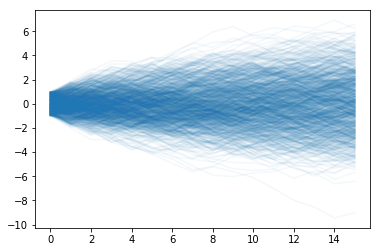

In [5]:
pos = [np.cumsum(stats.uniform.rvs(loc = -1, scale = 2, size = 16)) for i in range(1000)]
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
for i in enumerate(pos):
    ax1.plot(i[1], '-', color = 'tab:blue', alpha = 0.05)
plt.show()

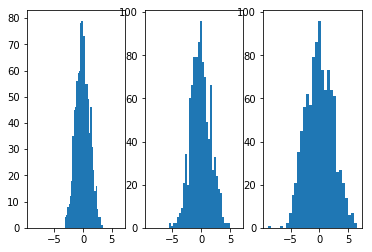

In [6]:
plt.close()
f, axarr = plt.subplots(1,3, sharex = True)
final_pos = np.zeros([1,3])
two_pos = np.ones([1,3])
a = np.vstack((final_pos, two_pos))

for i in enumerate(pos):
    final_pos = np.vstack((final_pos, [i[1][j] for j in [3,7,15]]))

for i in range(3):
    axarr[i-1].hist(final_pos[:, i-1], bins = 30)

plt.show()

## 4.2 - 4.3

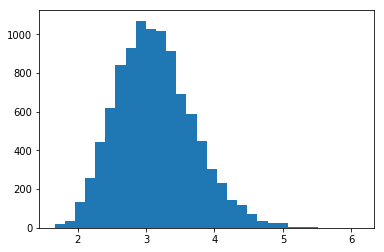

In [7]:
np.prod(stats.uniform.rvs(loc = 1, scale = 0.2, size = 12))
growth = [np.prod(stats.uniform.rvs(loc = 1, scale = 0.2, size = 12)) for i in range(10000)]
plt.hist(growth, bins = 30)
plt.show()

## 4.4

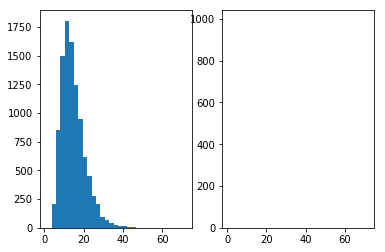

In [8]:
plt.close()
big   = [np.prod(stats.uniform.rvs(loc = 1, scale = 0.5,  size = 12)) for i in range(10000)]
small = [np.prod(stats.uniform.rvs(loc = 1, scale = 0.01, size = 12)) for i in range(10000)]
f, axarr = plt.subplots(1,2, sharex = True)
axarr[0].hist(big, bins = 30)
axarr[1].hist(small, bins = 30)
plt.show()

## 4.5

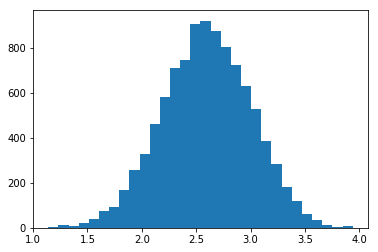

In [9]:
logbig = [np.log(np.prod(stats.uniform.rvs(loc = 1, scale = 0.5,  size = 12))) for i in range(10000)]
plt.hist(logbig, bins = 30)
plt.show()

## 4.7 - 4.8

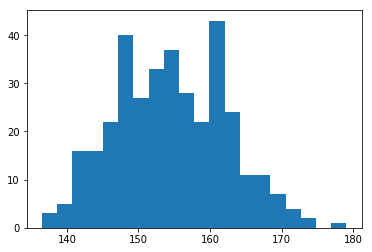

In [10]:
d = pd.read_csv('../data/Howell1.csv', sep=';', header=0)
d2 = d[d.age >= 18]
plt.hist(d2.height, bins = 20)
plt.show()

## 4.11 - 4.12

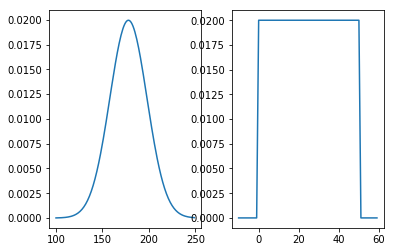

In [11]:
plt.close()
f, axarr = plt.subplots(1,2, sharex = False)
axarr[0].plot(range(100,250), [stats.norm.pdf(x, 178, 20) for x in range(100,250)], '-')
axarr[1].plot(range(-10,60), [stats.uniform.pdf(x, 0, 50) for x in range(-10,60)], '-')
plt.show()

## 4.13

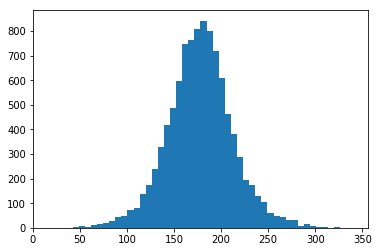

In [12]:
sample_mu = stats.norm.rvs(size = 10000, loc = 178, scale = 20)
sample_sigma = stats.uniform.rvs(size = 10000, loc = 0, scale = 50)
prior_h = stats.norm.rvs(size = 10000, loc = sample_mu, scale = sample_sigma)
plt.hist(prior_h, bins = 50)
plt.show()

## 4.14

In [13]:
post_grid = np.mgrid[140:160:200j, 4:9:200j]
post = post_grid.reshape((2, -1)).T
ll = [sum(stats.norm.logpdf(d2.height, loc = e[0], scale = e[1])) for i,e in enumerate(post)]
prod = ll + stats.norm.logpdf(post[:,0], loc = 178, scale = 20) + stats.norm.logpdf(post[:,1], loc = 0, scale = 50)
prob = np.exp(prod - max(prod))

## 4.15

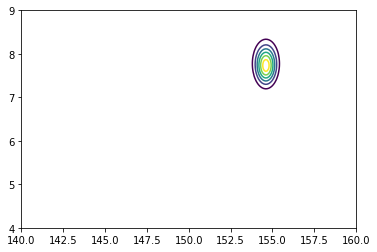

In [14]:
plt.contour(post_grid[0],post_grid[1], prob.reshape((200,-1)))
plt.show()

## 4.16

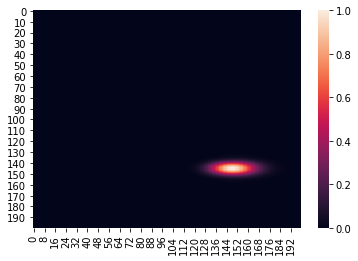

In [15]:
prob_grid = prob.reshape((200,-1))
sns.heatmap(prob_grid)
plt.show()

## 4.17 -4.18

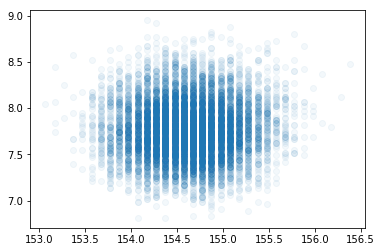

In [16]:
rows = np.random.choice(range(len(post)), size = 10000, replace = True, p = prob/sum(prob))
plt.plot(post[rows, 0], post[rows, 1], 'o', alpha = 0.05)
plt.show()

## 4.19 

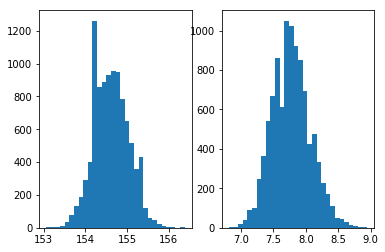

In [17]:
plt.close()
f, axarr = plt.subplots(1,2, sharex = False)
axarr[0].hist(post[rows, 0], bins = 30)
axarr[1].hist(post[rows, 1], bins = 30)
plt.show()

## 4.20

In [18]:
[pm.hpd(post[rows, 0], alpha = 0.05), pm.hpd(post[rows, 1], alpha = 0.05)]

[array([153.76884422, 155.37688442]), array([7.24120603, 8.39698492])]

## 4.21 - 4.23

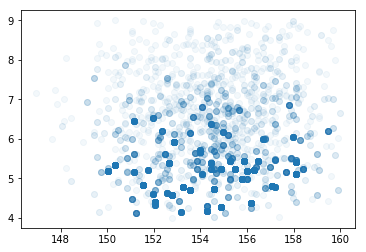

In [24]:
post_grid = np.mgrid[140:160:200j, 4:9:200j]
post = post_grid.reshape((2, -1)).T
ll = [sum(stats.norm.logpdf(np.random.choice(d2.height, 20), loc = e[0], scale = e[1])) for i,e in enumerate(post)]
prod = ll + stats.norm.logpdf(post[:,0], loc = 178, scale = 20) + stats.norm.logpdf(post[:,1], loc = 0, scale = 50)
prob = np.exp(prod - max(prod))
rows = np.random.choice(range(len(post)), size = 10000, replace = True, p = prob/sum(prob))
plt.plot(post[rows, 0], post[rows, 1], 'o', alpha = 0.05)
plt.show()

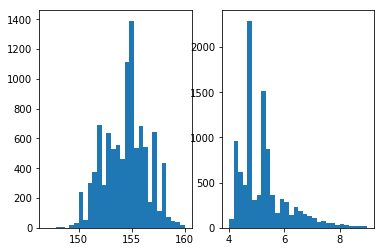

In [25]:
plt.close()
f, axarr = plt.subplots(1,2, sharex = False)
axarr[0].hist(post[rows, 0], bins = 30)
axarr[1].hist(post[rows, 1], bins = 30)
plt.show()

## 4.25 - 4.26

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_interval__, mu]
100%|██████████| 2000/2000 [00:01<00:00, 1190.30it/s]


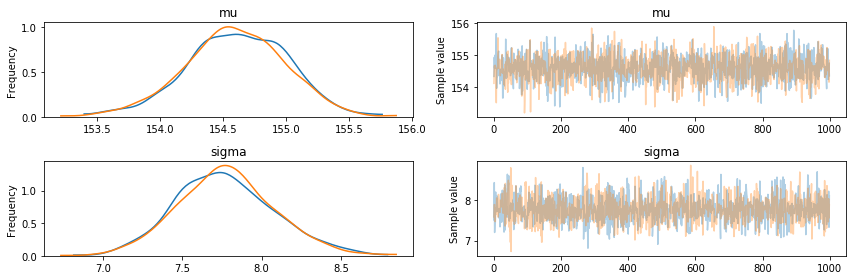

In [30]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)

with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

pm.traceplot(trace_4_1); # this function let you check the samples values

## 4.27

In [31]:
pm.summary(trace_4_1, alpha=.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.60,0.40,0.01,153.96,155.22,2000.0,1.0
sigma,7.77,0.31,0.01,7.25,8.23,1910.0,1.0


## 4.29

In [32]:
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sd=0.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)

with m4_2:
    trace_4_2 = pm.sample(1000, tune=1000)

pm.summary(trace_4_2, alpha=.11).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_interval__, mu]
100%|██████████| 2000/2000 [00:02<00:00, 809.58it/s]


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,177.86,0.10,0.00,177.72,178.03,1943.0,1.0
sigma,24.60,0.93,0.02,23.16,26.12,1775.0,1.0


## 4.30

In [35]:
trace_df = pm.trace_to_dataframe(trace_4_1)
trace_df.cov()

,mu,sigma
mu,0.158777,-0.001809
sigma,-0.001809,0.093637


## 4.34

In [37]:
stats.multivariate_normal.rvs(mean=trace_df.mean(), cov=trace_df.cov(), size=10)

array([[154.56850604,   7.94416703],
       [154.2195385 ,   7.76170376],
       [154.18162826,   7.85457521],
       [154.92099449,   7.63088485],
       [154.95011773,   8.08625136],
       [154.53647263,   7.707697  ],
       [154.43782505,   7.71271893],
       [154.74668987,   7.68828331],
       [154.86051774,   8.40667002],
       [154.15708136,   7.81218566]])

## 4.35 - 4.36

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_log__, mu]
100%|██████████| 2000/2000 [00:01<00:00, 1271.65it/s]


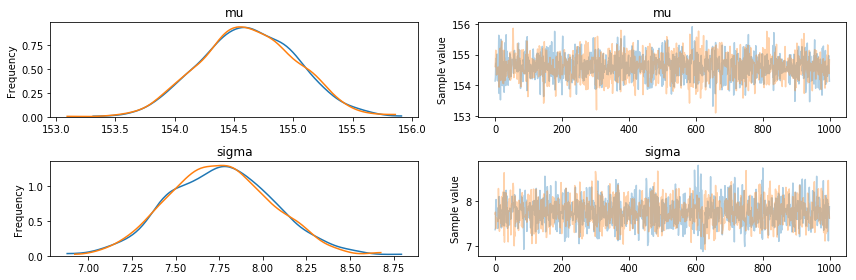

In [38]:
with pm.Model() as m4_1_logsigma:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Lognormal('sigma', mu=2, tau=0.01)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_1_logsigma = pm.sample(1000, tune=1000)

pm.traceplot(trace_4_1_logsigma);

## 4.37

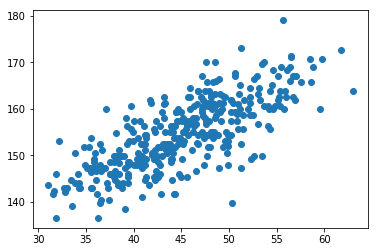

In [41]:
plt.plot(d2.weight, d2.height, 'o')
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_interval__, b, a]
100%|██████████| 2000/2000 [00:07<00:00, 272.47it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1129cd6a0>,
      dtype=object)

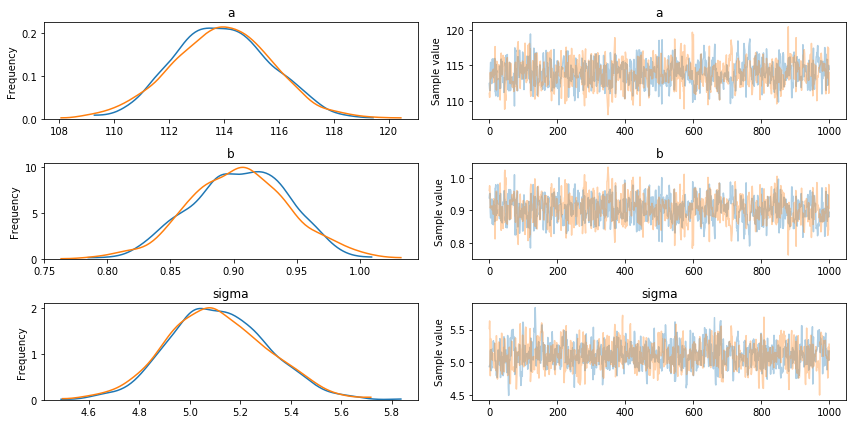

In [46]:
with pm.Model() as m4_3:
    a = pm.Normal('a', mu = 156, sd = 100)
    b = pm.Normal('b', mu = 0, sd = 10)
    mu = a + b * d2.weight
    sigma = pm.Uniform('sigma', lower = 0, upper = 50)
    height = pm.Normal('height', mu = mu, sd = sigma, observed = d2.height)
    trace_m4_3 = pm.sample(1000, tune = 1000)
    
pm.traceplot(trace_m4_3)

## 4.40

In [55]:
pm.summary(trace_m4_3)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,113.907999,1.779860,0.062101,110.407629,117.234208,694.0,0.999523
b,0.904342,0.039168,0.001365,0.830733,0.981948,831.0,0.999518
sigma,5.108232,0.194513,0.006610,4.746329,5.486375,763.0,0.999970


In [58]:
pm.trace_to_dataframe(trace_m4_3).corr()

,a,b,sigma
a,1.000000,-0.988047,0.023456
b,-0.988047,1.000000,-0.027659
sigma,0.023456,-0.027659,1.000000


## 4.45

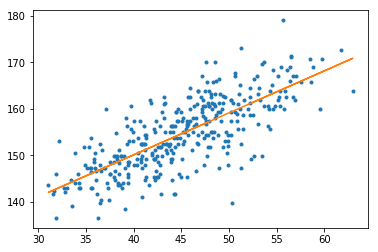

In [60]:
plt.plot(d2.weight, d2.height, '.')
plt.plot(d2.weight, trace_4_3['a'].mean() + trace_4_3['b'].mean() * d2.weight)

## 4.48

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_interval__, b, a]
100%|██████████| 2000/2000 [00:04<00:00, 411.19it/s]
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6187003667079843, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aac3710>,
      dtype=object)

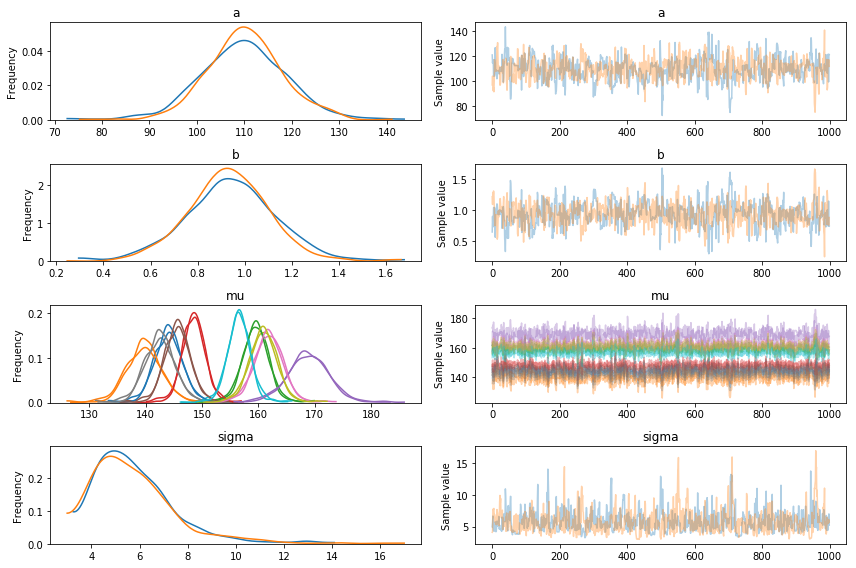

In [161]:
def modelN (N, dd):
    dN = dd.loc[1:N]
    with pm.Model() as model:
        a = pm.Normal('a', mu = 156, sd = 100)
        b = pm.Normal('b', mu = 0, sd = 10)
        mu = pm.Deterministic('mu', a + b * dN.weight)
        sigma = pm.Uniform('sigma', lower = 0, upper = 50)
        height = pm.Normal('height', mu = mu, sd = sigma, observed = dN.height)
        trace = pm.sample(1000, tune = 1000)
    return model, trace, dN
        
m_N, trace_mN_10, dN = modelN(10, d2)
pm.traceplot(trace_mN_10)

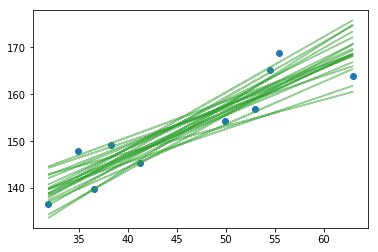

In [121]:
samples = trace_mN_10[100:]
plt.plot(dN.weight, dN.height, 'o')
for _ in range(0,20):
    i = np.random.randint(len(samples))
    plt.plot(dN.weight, samples['mu'][i], 'C2-', alpha = 0.5)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_interval__, b, a]
100%|██████████| 2000/2000 [00:06<00:00, 303.23it/s]
The number of effective samples is smaller than 25% for some parameters.


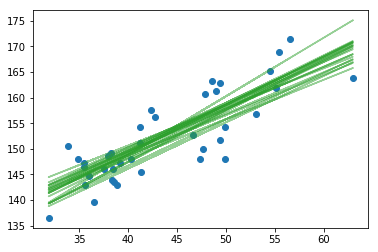

In [107]:
trace_mN_20, dN = modelN(20, d2)
samples = trace_mN_20[100:]
plt.plot(dN.weight, dN.height, 'o')
for _ in range(0,20):
    i = np.random.randint(len(samples))
    plt.plot(dN.weight, samples['mu'][i], 'C2-', alpha = 0.5)
plt.show()

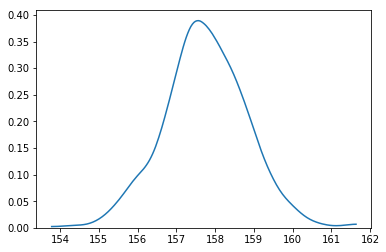

In [114]:
mu_at_50 = samples['a'] + samples['b'] * 50
pm.kdeplot(mu_at_50)

In [122]:
pm.hpd(mu_at_50, alpha = 0.11)

array([155.99121128, 159.41141847])

## 4.53

In [128]:
(pm.trace_to_dataframe(samples).filter(regex=('mu.*'))).head()

,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,mu__7,mu__8,mu__9
0,146.047577,142.107246,160.165083,150.132951,168.650091,147.546353,162.244031,144.669670,161.397947,157.481790
1,143.623687,138.958633,160.337744,148.460460,170.383351,145.398124,162.799061,141.992349,161.797363,157.160929
2,146.908511,142.542935,162.549592,151.434782,171.950310,148.569036,164.852902,145.381898,163.915508,159.576715
3,148.509392,145.060532,160.866046,152.085205,168.292734,149.821229,162.685691,147.303349,161.945138,158.517436
4,143.299420,138.372226,160.952679,148.407983,171.562772,145.173567,163.552303,141.576413,162.494317,157.597351


## 4.54

In [149]:
weigth_seq = np.arange(25,70)
mu_pred = np.zeros((len(weigth_seq), len(samples[::10])*samples.nchains))
for i, w in enumerate(weight_seq):
    mu_pred[i] = pm.trace_to_dataframe(samples)['a'][::10] + pm.trace_to_dataframe(samples)['b'][::10] * w

## 4.55

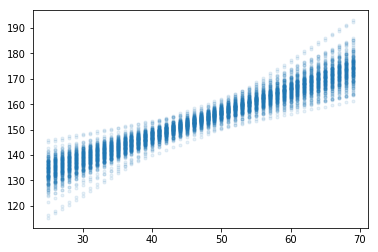

In [152]:
plt.plot(weigth_seq, mu_pred, 'C0.', alpha=0.1)
plt.show()

## 4.56

In [153]:
mu_mean = mu_pred.mean(1)
mu_hpd = pm.hpd(mu_pred.T, alpha=.11)

## 4.57

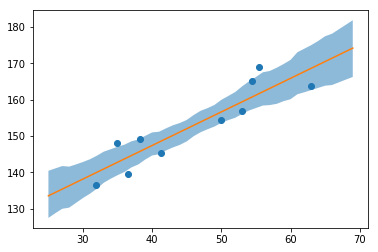

In [160]:
plt.plot(dN.weight, dN.height, 'o')
plt.plot(weight_seq, mu_mean, '-')
plt.fill_between(weight_seq, mu_hpd[:,0], mu_hpd[:,1], alpha = 0.5)
plt.show()

In [197]:
height_pred = pm.sample_ppc(samples, 200, m_N)

100%|██████████| 200/200 [00:00<00:00, 1696.05it/s]


In [198]:
height_pred_hpd = pm.hpd(height_pred['height'])

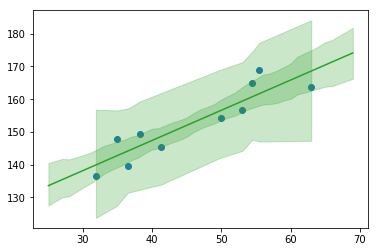

In [199]:
idx = np.argsort(dN.weight.values)
dN_weight_ord = dN.weight.values[idx]
height_pred_hpd = height_pred_hpd[idx]
plt.scatter(dN.weight, dN.height)
plt.fill_between(weigth_seq, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)
plt.fill_between(dN_weight_ord, height_pred_hpd[:,0], height_pred_hpd[:,1], color='C2', alpha=0.25)
plt.plot(weigth_seq, mu_mean, 'C2')
plt.show()

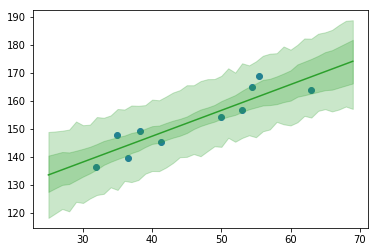

In [206]:
weigth_seq = np.arange(25, 70)
post_samples = []
for _ in range(1000): # number of samples from the posterior
    i = np.random.randint(len(samples))
    mu_pred = samples['a'][i] + samples['b'][i] * weigth_seq
    sigma_pred = samples['sigma'][i]
    post_samples.append(np.random.normal(mu_pred, sigma_pred))
post_samples_hpd = pm.hpd(np.array(post_samples))
plt.scatter(dN.weight, dN.height)
plt.fill_between(weigth_seq, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)
plt.fill_between(weight_seq, post_samples_hpd[:,0], post_samples_hpd[:,1], color='C2', alpha=0.25)
plt.plot(weigth_seq, mu_mean, 'C2')
plt.show()